## 1. Loading the Dataset


Now, lets get started by importing important packages and the dataset.

In [1]:
!pip install --upgrade spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# spacy needs language models - let's make sure they are downloaded
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md

2022-11-29 14:09:34.149468: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 8.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2022-11-29 14:09:55.569703: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


**1.1 Import the necessary Python modules**

In [3]:
# Load python modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import spacy



In [4]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))


**1.2 Load Dataset **

The csv files were downloaded from the URL to my local drive and loaded from there as shown in the code below.

Pandas was used to load the data. Pandas will also be used next to explore the data both with descriptive statistics and data visualization.


In [5]:
#@title Default title text
# Load dataset from local drive (for colab notebook)
from google.colab import files
import io

uploaded = files.upload()    # Will prompt you to select file: remember to choose the right one!
Whole_dataset = pd.read_csv(io.BytesIO(uploaded['processed_reviews_split_surnamesEFGH_minimal.csv']))

Saving processed_reviews_split_surnamesEFGH_minimal.csv to processed_reviews_split_surnamesEFGH_minimal.csv


In [6]:
# list of column titles 
print(Whole_dataset.columns)

Index(['review_id', 'text', 'confidence_score', 'review_score',
       'acceptance_status'],
      dtype='object')


In [7]:
# list of column (field) data types
print(Whole_dataset.dtypes)



review_id             object
text                  object
confidence_score     float64
review_score         float64
acceptance_status     object
dtype: object



"NaN" means "Not a Number". It is not the same as 0. Python replaces empty/missing fields in the data with "NaN".


In [8]:
# Showing the first 10 rows in a dataframe with the function "head"
Whole_dataset.head(10)


,review_id,text,confidence_score,review_score,acceptance_status
0,iclr_review_0000,Efficient Exploration through Bayesian Deep Q-...,2.0,4.0,Reject
1,iclr_review_0001,FoveaBox: Beyound Anchor-based Object Detectio...,NaN,3.0,Reject
2,iclr_review_0002,Key Protected Classification for GAN Attack Re...,4.0,3.0,Reject
3,iclr_review_0003,NaN,3.0,7.0,Reject
4,iclr_review_0004,Truth or backpropaganda? An empirical investig...,NaN,6.0,Accept
5,iclr_review_0005,On the Dynamics and Convergence of Weight Norm...,NaN,6.0,Reject
6,iclr_review_0006,Continual Learning via Principal Components Pr...,NaN,3.0,Reject
7,iclr_review_0007,Demystifying overcomplete nonlinear auto-encod...,4.0,2.0,Reject
8,iclr_review_0008,NaN,4.0,4.0,Reject
9,iclr_review_0009,On the limitations of first order approximatio...,3.0,7.0,Accept


In [9]:
# showing a random subset of the data with the function "sample":
Whole_dataset.sample(10)

,review_id,text,confidence_score,review_score,acceptance_status
3037,iclr_review_3037,Not All Features Are Equal: Feature Leveling D...,NaN,3.0,Reject
5653,iclr_review_5653,Gradient Descent Happens in a Tiny Subspace. W...,4.0,6.0,Reject
2536,iclr_review_2536,Evidence Aggregation for Answer Re-Ranking in ...,4.0,6.0,Accept
6056,iclr_review_6056,Target-directed Atomic Importance Estimation v...,NaN,1.0,NaN
1792,iclr_review_1792,Why Gradient Clipping Accelerates Training: A ...,NaN,8.0,Accept
5809,iclr_review_5809,iRDA Method for Sparse Convolutional Neural Ne...,4.0,3.0,Reject
2895,iclr_review_2895,EfferenceNets for latent space planning. Plann...,NaN,1.0,NaN
4977,iclr_review_4977,Learning when to Communicate at Scale in Multi...,3.0,7.0,Accept
206,iclr_review_0206,RotatE: Knowledge Graph Embedding by Relationa...,3.0,7.0,Accept
1625,iclr_review_1625,Differentiable Bayesian Neural Network Inferen...,NaN,3.0,Reject


A little EDA to get a little understanding of the dataset we are working with

First EDA steps: use Pandas `describe()` function to get some high-level statistics about the data

For NUMERICAL features, we can get the following info:

*   count = Count number of non-NA/null observations for a feature (see also below).
*   mean = average value of each feature.
*   std = standard deviation of the values in each feature
*   min = Minium of the values in the feature.
*   max = Maximum of the values in the feature.
*   25%, 50%, 75% = 25%, 50%, 75% percentiles in each feature. 50% percentile=median



In [10]:
# Summary statistics for numerical features
Whole_dataset.describe()


,confidence_score,review_score
count,3320.000000,6119.000000
mean,3.796386,4.679359
std,0.812741,2.196125
min,1.000000,-1.000000
25%,3.000000,3.000000
50%,4.000000,5.000000
75%,4.000000,6.000000
max,5.000000,10.000000


In [11]:
# what data structure do we have?
type(Whole_dataset)

pandas.core.frame.DataFrame

##### It's a dataframe, OK. We can get the length then, which tells us how many data points we have..

In [12]:
print(f'Length of Whole dataset data: {len(Whole_dataset)}')

Length of Whole dataset data: 6119


## 3. Managing Missing Data



First, let's find out how many missing values (or NaN values) there are in each feature, using Pandas `isna()` function. 

In [13]:
# Number of missing values per column
Whole_dataset.isna().sum()

review_id               0
text                   84
confidence_score     2799
review_score            0
acceptance_status     399
dtype: int64

In [14]:
#dropping the 'confidence_score' column because it has too many NaN values
Whole_dataset = Whole_dataset.drop(columns = ['confidence_score']).copy()


In [15]:
# remove all rows with missing data
# dropna removes all rows that contain at least one missing value
print(f'Original dataset length: {len(Whole_dataset)}')
reduced_dataset = Whole_dataset.dropna()
print(f'Dataset length after removing missing rows: {len(reduced_dataset)}')

Original dataset length: 6119
Dataset length after removing missing rows: 5644


In [16]:
reduced_dataset.isna().sum()

review_id            0
text                 0
review_score         0
acceptance_status    0
dtype: int64

In [17]:
# NEXT STEP IS NATURAL LANGUAGE PROCESSING USING SPACY

In [18]:
# Create an NLP pipeline
nlp = spacy.load('en_core_web_md') #add mention to other languages

In [19]:
#RENAMING THE TEXT COLUMN OF OUR CLEANED DATAFRAME

reduced_dataset = reduced_dataset.rename(columns = {"text":"review_text"})

In [20]:
#NEXT STEP LEMMATIZATION

In [21]:
#TIME FOR TOKENIZATION AND LEMMATIZATION OF THE THE WHOLE OF OUR DOCUMENTS.

In [22]:
# let's call nlp.pipe on our cleaned dataset and convert the result to a list
#  this will be applied to to all the text documents.
from time import time
t_start= time()
reduced_dataset_processed = list(nlp.pipe(reduced_dataset['review_text'].iloc[:7000]))
print(f'Processing the entire cleaned data took {time()-t_start:.2f} seconds')



Processing the entire cleaned data took 443.12 seconds


In [ ]:
#TIME FOR MORE EDA

**TIME FOR MORE EDA**

In [23]:
# get the length of all processed documents in the whole cleaned dataset
Reduced_processed_Dataset_doc_lengths= []
for doc in reduced_dataset_processed:
  Reduced_processed_Dataset_doc_lengths.append(len(doc.text)) #doc.text contains the whole text of the original document

  #note that the reduced_dataset_processed variable holds both the original text and the processed text. So when we use "doc.text", we access and retrieve the original text.


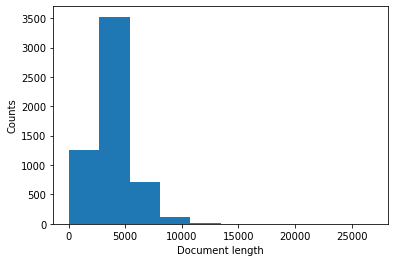

In [24]:
import matplotlib.pyplot as plt
# plot the distribution of lengths in an histogram
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(Reduced_processed_Dataset_doc_lengths)
ax.set_xlabel('Document length')
_ =ax.set_ylabel('Counts')


In [25]:
# get the number of tokens in each document
Reduced_processed_Dataset_doc_tokens= []
for doc in reduced_dataset_processed:
  Reduced_processed_Dataset_doc_tokens.append(len(doc)) #the length of a spaCy document is the number of tokens

  #Here the len(doc) command accesses and retrieves the processed data (i.e. tokenized data) contained in the reduced_dataset_processed.



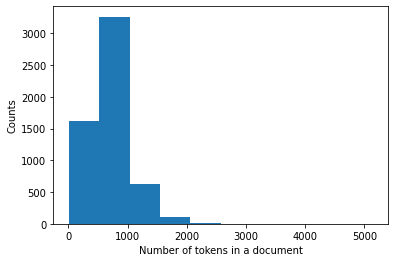

In [26]:
import matplotlib.pyplot as plt
# plot the distribution of lengths in an histogram
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(Reduced_processed_Dataset_doc_tokens)
ax.set_xlabel('Number of tokens in a document')
_ =ax.set_ylabel('Counts')


In [27]:
# let's cycle through the documents again, but this time we'll keep track of positive
# and negative reviews separately
pos_Reduced_processed_Dataset_doc_tokens= []
neg_Reduced_processed_Dataset_doc_tokens= []
for i,doc in enumerate(reduced_dataset_processed):
  if reduced_dataset.iloc[i]['acceptance_status']=='Accept':
    pos_Reduced_processed_Dataset_doc_tokens.append(len(doc)) #the length of a spaCy document is the number of tokens
  elif reduced_dataset.iloc[i]['acceptance_status']=='Reject':
      neg_Reduced_processed_Dataset_doc_tokens.append(len(doc))


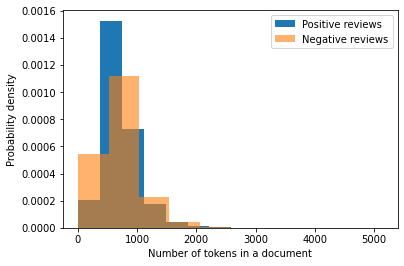

In [28]:
import matplotlib.pyplot as plt
# plot the distribution of lengths in an histogram
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(pos_Reduced_processed_Dataset_doc_tokens, density= True)
ax.hist(neg_Reduced_processed_Dataset_doc_tokens, alpha=0.6, density=True)
ax.set_xlabel('Number of tokens in a document')
_ =ax.set_ylabel('Probability density')
_= ax.legend(['Positive reviews','Negative reviews'])


In [29]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# create a tokenizer that leaves documents already tokenized as they are:
def tokenize_as_is(x):
  ''' x is a list of tokens. It's returned as is'''
  return x

# define a function to get the most frequent ngrams
def get_top_ngram(spacy_tokenized_corpus, ngram_range=(1,2), top_n= 50):
    ''' By default it return the top 50 unigrams/bigrams'''
    vec = CountVectorizer(ngram_range=ngram_range, max_features=top_n, lowercase=False,
                          tokenizer=tokenize_as_is).fit(spacy_tokenized_corpus)
    # get a vector for each document
    bag_of_words = vec.transform(spacy_tokenized_corpus)
    # sum across documents
    sum_words = bag_of_words.sum(axis=0) 
    # get the words with their frequencies and order them
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return bag_of_words, words_freq#[:10]

In [30]:
Reduced_processed_Dataset_tokenized = []
for i,doc in enumerate(reduced_dataset_processed):
  # let's collect all valid tokens (i.e. no stop words, no punctuation) into a list
  Reduced_processed_Dataset_tokenized.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


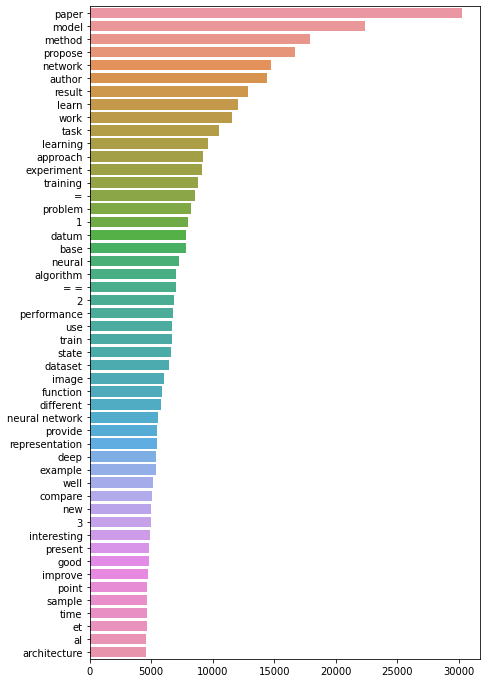

In [31]:
# let's get the words frequencies
bag_of_words, words_freq= get_top_ngram(Reduced_processed_Dataset_tokenized, ngram_range=(1,2), top_n= 50)

# let's plot them
import seaborn as sns
# separate the n_grams from their frequencies
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
sns.barplot(x=ngram_freqs,y=ngram_labels)


In [32]:
words_freq[1]

('model', 22346)

In [33]:
# this function replaces all occurrences of the "newline" character with the empty string
df_temp= reduced_dataset['review_text'].map(lambda x: x.replace('\n',''))


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


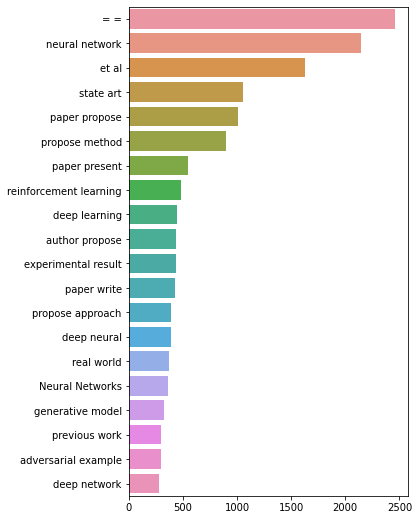

In [34]:
# Most common bigrams for positive reviews
pos_Reduced_processed_Dataset_tokenized= []
for i,doc in enumerate(reduced_dataset_processed):
  if reduced_dataset.iloc[i]['acceptance_status']=='Accept':
    # let's collect all valid tokens (i.e. no stop words, no punctuation) into a list
    pos_Reduced_processed_Dataset_tokenized.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])

_, pos_bigram_freq= get_top_ngram(pos_Reduced_processed_Dataset_tokenized, ngram_range=(2,2), top_n= 20)

# let's plot them
# separate the n_grams from their frequencies
# let's temporarily remove the spurious newline character since we know it's there (but let's make it obvious)
pos_bigram_labels = [word[0].replace('\n\n\n\n','NEWLINE') for word in pos_bigram_freq]
pos_bigram_freqs = [word[1] for word in pos_bigram_freq]
plt.figure(figsize=(5,9))
sns.barplot(x=pos_bigram_freqs,y=pos_bigram_labels)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


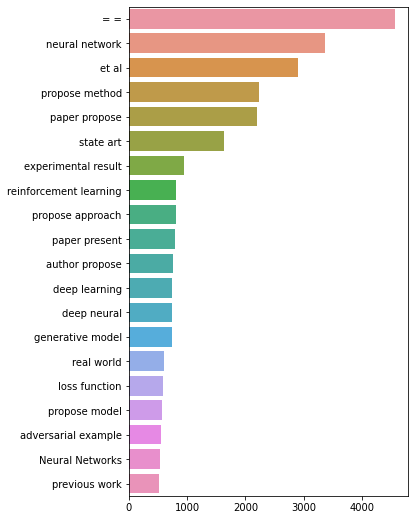

In [35]:
# Most common bigrams for negative reviews
neg_Reduced_processed_Dataset_tokenized= []
for i,doc in enumerate(reduced_dataset_processed):
  if reduced_dataset.iloc[i]['acceptance_status']=='Reject':
    # let's collect all valid tokens (i.e. no stop words, no punctuation) into a list
    neg_Reduced_processed_Dataset_tokenized.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])

_, neg_bigram_freq= get_top_ngram(neg_Reduced_processed_Dataset_tokenized, ngram_range=(2,2), top_n= 20)

# let's plot them
# separate the n_grams from their frequencies
neg_bigram_labels = [word[0].replace('\n\n\n\n','NEWLINE') for word in neg_bigram_freq]
neg_bigram_freqs = [word[1] for word in neg_bigram_freq]
plt.figure(figsize=(5,9))
sns.barplot(x=neg_bigram_freqs,y=neg_bigram_labels)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


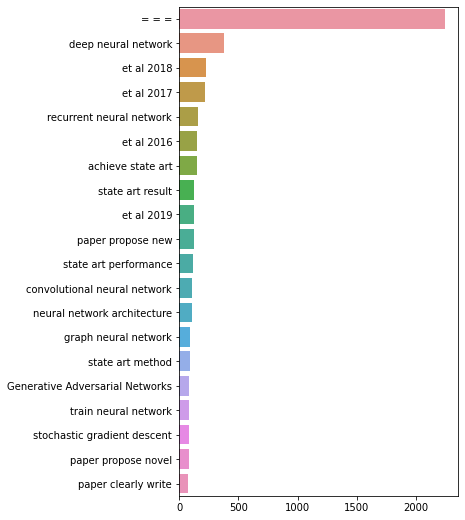

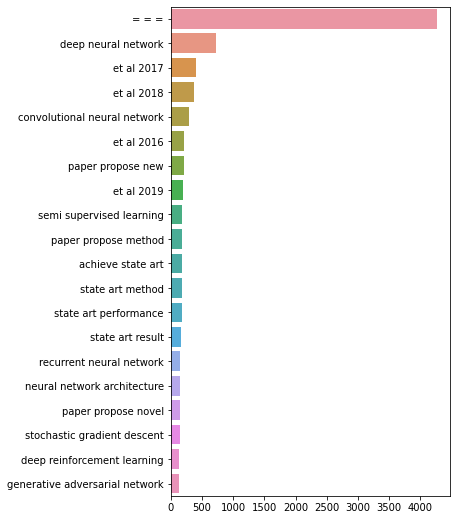

In [36]:
# Most common trigrams for positive reviews
pos_Reduced_processed_Dataset_tokenized= []
for i,doc in enumerate(reduced_dataset_processed):
  if reduced_dataset.iloc[i]['acceptance_status']=='Accept':
    # let's collect all valid tokens (i.e. no stop words, no punctuation) into a list
    pos_Reduced_processed_Dataset_tokenized.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])

_, pos_bigram_freq= get_top_ngram(pos_Reduced_processed_Dataset_tokenized, ngram_range=(3,3), top_n= 20)

# let's plot them
# separate the n_grams from their frequencies
# let's temporarily remove the spurious newline character since we know it's there (but let's make it obvious)
pos_bigram_labels = [word[0].replace('\n\n\n\n','NEWLINE') for word in pos_bigram_freq]
pos_bigram_freqs = [word[1] for word in pos_bigram_freq]
plt.figure(figsize=(5,9))
sns.barplot(x=pos_bigram_freqs,y=pos_bigram_labels)


# Most common trigrams for negative reviews
neg_Reduced_processed_Dataset_tokenized= []
for i,doc in enumerate(reduced_dataset_processed):
  if reduced_dataset.iloc[i]['acceptance_status']=='Reject':
    # let's collect all valid tokens (i.e. no stop words, no punctuation) into a list
    neg_Reduced_processed_Dataset_tokenized.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])

_, neg_bigram_freq= get_top_ngram(neg_Reduced_processed_Dataset_tokenized, ngram_range=(3,3), top_n= 20)

# let's plot them
# separate the n_grams from their frequencies
neg_bigram_labels = [word[0].replace('\n\n\n\n','NEWLINE') for word in neg_bigram_freq]
neg_bigram_freqs = [word[1] for word in neg_bigram_freq]
plt.figure(figsize=(5,9))
sns.barplot(x=neg_bigram_freqs,y=neg_bigram_labels)


** FURTHER TEXT PRE-PROCESSISNG USING BOW MODEL FOR WHOLE_DATASET **

In [37]:
reduced_dataset_processed_tokenized = []
for i,doc in enumerate(reduced_dataset_processed):
  # let's collect all valid tokens (i.e. no stop words, no punctuation) into a list
  reduced_dataset_processed_tokenized.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])


In [38]:
from sklearn.feature_extraction.text import CountVectorizer


In [39]:
# Let's create another BoW model, with bigrams and no thresholds
BoW5_reduced_dataset_processed_count_vectorizer = CountVectorizer(ngram_range=(1,3), lowercase=False, tokenizer=tokenize_as_is,
                       min_df=10, max_df=0.5).fit(reduced_dataset_processed_tokenized)

# how many features do we have
print(f"\n The number of features in the vocabulary is {len(BoW5_reduced_dataset_processed_count_vectorizer .get_feature_names_out())}\n")


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



 The number of features in the vocabulary is 28787



In [40]:
# fit and transform our cleaned and processed dataset called reduced_dataset_processed_tokenized using count vectorizer, into our document matrix named new_dataset
new_dataset = BoW5_reduced_dataset_processed_count_vectorizer.fit_transform(reduced_dataset_processed_tokenized)



In [41]:
#print the shape of our document matrix called new_dataset
type (new_dataset)
print (new_dataset.shape[1])
print (new_dataset.shape[0])


28787
5644


In [42]:
type (new_dataset)

scipy.sparse.csr.csr_matrix

In [43]:
#reducing the dimensions of our document matrix
from sklearn.decomposition import TruncatedSVD, PCA
#from scipy.sparse import csr_matrix

pca= PCA(n_components=.8, random_state=0)
dimension_reduced_new_dataset = pca.fit_transform(new_dataset.todense())
print(f'Number of components is {dimension_reduced_new_dataset.shape[1]}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Number of components is 647


In [44]:
#printing the shape of our dimensiion reduced document matrix
print (dimension_reduced_new_dataset.shape[1])
print (dimension_reduced_new_dataset.shape[0])


647
5644


In [45]:
#splitting our document matrix to our X_train(80%) and X_test (20%)
X_train, X_test = train_test_split(dimension_reduced_new_dataset, test_size=0.2)

In [46]:
X_train.shape, X_test.shape

((4515, 647), (1129, 647))

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#fetching and isolating the target data from the whole cleaned dataset called reduced_dataset.
reduced_target_data = reduced_dataset['acceptance_status']

#spliting the target data to train(80%) and test(20%)
y_train, y_test = train_test_split(reduced_target_data, test_size=0.2)

#code to standardise the X_train and X_test
sc = StandardScaler()
standardised_X_train = sc.fit_transform(X_train)
standardised_X_test = sc.transform(X_test)



In [48]:
y_train.shape, y_test.shape

((4515,), (1129,))

In [49]:
#One hot encoding the y-train and y_test variables.

In [50]:
encoded_y_train = pd.get_dummies(y_train)
encoded_y_test = pd.get_dummies(y_test)

In [51]:
print (encoded_y_train)

      Accept  Reject
3820       0       1
5808       0       1
5755       0       1
5935       0       1
6099       0       1
...      ...     ...
1453       0       1
810        1       0
3181       0       1
5863       0       1
1846       0       1

[4515 rows x 2 columns]


In [54]:
new_encoded_y_train= encoded_y_train.drop('Reject', axis=1)

In [55]:
new_encoded_y_test= encoded_y_test.drop('Reject', axis=1)

** Applying the logistic regression algorithm ** 

In [57]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(standardised_X_train,new_encoded_y_train)
y_pred = logreg.predict(standardised_X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(new_encoded_y_test, y_pred)
cnf_matrix

array([[543, 169],
       [313, 104]])

Text(0.5, 257.44, 'Predicted label')

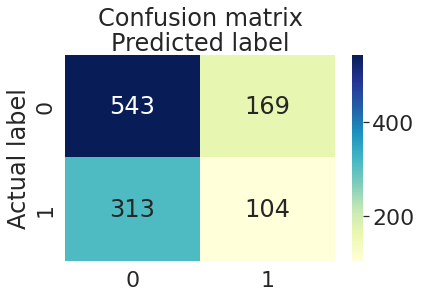

In [60]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 2.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '16'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.3)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**NOW COMES THE EVALUATION OF THE LOGISTIC REGRESSION ALGORITHM**

In [61]:
print("Accuracy:",metrics.accuracy_score(new_encoded_y_test, y_pred))
print("Precision:",metrics.precision_score(new_encoded_y_test, y_pred))
print("Recall:",metrics.recall_score(new_encoded_y_test, y_pred))

Accuracy: 0.5730735163861824
Precision: 0.38095238095238093
Recall: 0.24940047961630696


In [62]:
print("F1_score:",metrics.f1_score(new_encoded_y_test, y_pred))

F1_score: 0.3014492753623188


**FOR SUPPORT VECTOR MACHINE OF REVIEW SCORE**

In [63]:

#fetching and isolating the target data from the whole cleaned dataset called reduced_dataset.
reduced_target_data = reduced_dataset['review_score']


In [64]:
#spliting the target data to train(80%) and test(20%)
review_score_y_train, review_score_y_test = train_test_split(reduced_target_data, test_size=0.2)

In [65]:
review_score_y_train.shape, review_score_y_test.shape

((4515,), (1129,))

In [66]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, review_score_y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(review_score_y_test, y_pred))


              precision    recall  f1-score   support

        -1.0       0.02      0.03      0.02        32
         1.0       0.03      0.04      0.04        68
         2.0       0.00      0.00      0.00        15
         3.0       0.21      0.23      0.22       240
         4.0       0.14      0.16      0.15       119
         5.0       0.07      0.06      0.07       128
         6.0       0.26      0.22      0.24       307
         7.0       0.09      0.07      0.08       118
         8.0       0.07      0.05      0.06        94
         9.0       0.00      0.00      0.00         8

    accuracy                           0.15      1129
   macro avg       0.09      0.09      0.09      1129
weighted avg       0.16      0.15      0.15      1129



In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def roc_classifier(grid, X_train, review_score_y_train, X_test, review_score_y_test):
    # predict probabilities
    lr_probs_train = grid.predict_proba(X_train)
    lr_probs_test = grid.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs_train = lr_probs_train[:, 1]
    lr_probs_test = lr_probs_test[:, 1]

    print('ROC AUC (Training)={:.3f}'.format(roc_auc_score(review_score_y_train, lr_probs_train)))
    print('ROC AUC (Testing)={:.3f}'.format(roc_auc_score(review_score_y_test, lr_probs_test)))

    # compute false positive and true positive rates
    lr_fpr_train, lr_tpr_train, _ = roc_curve(review_score_y_train, lr_probs_train)
    lr_fpr_test, lr_tpr_test, _ = roc_curve(review_score_y_test, lr_probs_test)

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC, LinearSVC

# set up the hyper-parameters we want to investigate
# adventurous students might also explore multiple kernels
param_grid_svc=[{'C': np.logspace(-2,2,5)}, #inverse of regularization strength
          {'max_iter': [10000]}]

svc_clf = SVC(kernel='linear', class_weight='balanced', probability=True)

# refer to sklearn documentation for more details:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_svc = GridSearchCV(estimator=svc_clf, param_grid=param_grid_svc, 
                        cv=5, scoring='f1_macro', refit=True) # you can change scoring function that will impact the estimator
grid_svc = grid_svc.fit(X_train, review_score_y_train)
print('Best estimator: {}\nWeights: {}, Intercept: {}\nBest params: {}\nScorer: {}'.format(grid_svc.best_estimator_, 
                                                                                           grid_svc.best_estimator_.coef_, 
                                                                                           grid_svc.best_estimator_.intercept_,
                                                                                           grid_svc.best_params_, 
                                                                                           grid_svc.scorer_))
print('Available parameters for the estimator (fine-tuning): ',svc_clf.get_params().keys())

y_train_predict, y_test_predict = evaluate_classifier(grid_svc, X_train, review_score_y_train, X_test, review_score_y_test)

lr_probs_train, lr_fpr_train, lr_tpr_train, lr_probs_test, lr_fpr_test, lr_tpr_test = roc_classifier(
                                                                    grid_svc, X_train, review_score_y_train, X_test, review_score_y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
